## Import

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1 - Thresholding


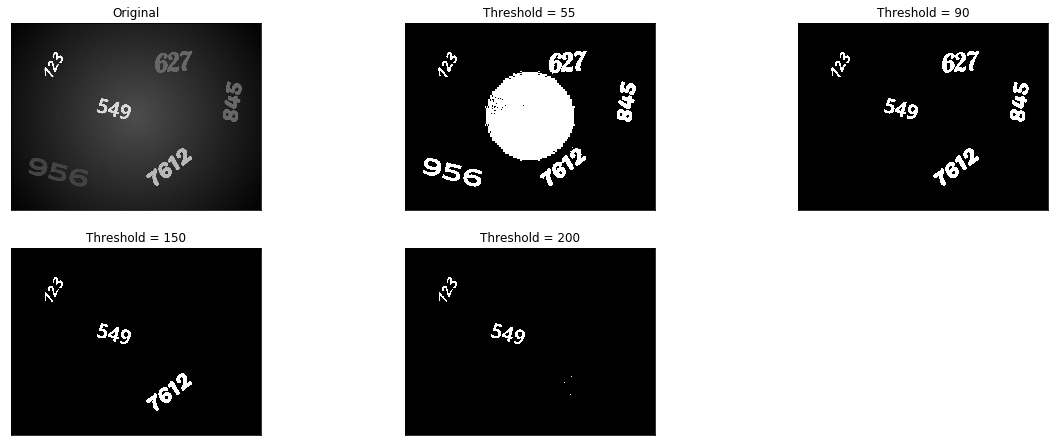

In [2]:

# load image
image_path = "./numbers.jpg"
img = cv2.imread(image_path)

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_thresh1 = cv2.threshold(img_gray, 55, 255, cv2.THRESH_BINARY)
ret, img_thresh2 = cv2.threshold(img_gray, 90, 255, cv2.THRESH_BINARY)
ret, img_thresh3 = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
ret, img_thresh4 = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(531), plt.imshow(img_gray, cmap="gray")
plt.title("Original"), plt.xticks([]), plt.yticks([])

plt.subplot(532),plt.imshow(img_thresh1, cmap="gray")
plt.title("Threshold = 55"), plt.xticks([]), plt.yticks([])

plt.subplot(533),plt.imshow(img_thresh2, cmap="gray")
plt.title("Threshold = 90"), plt.xticks([]), plt.yticks([])

plt.subplot(534),plt.imshow(img_thresh3, cmap="gray")
plt.title("Threshold = 150"), plt.xticks([]), plt.yticks([])

plt.subplot(535),plt.imshow(img_thresh4, cmap="gray")
plt.title("Threshold = 200"), plt.xticks([]), plt.yticks([])
plt.show()

With a threshold of 50, #549 is not visible in this image because its intensity is above the threshold and the intensity of pixels around it is also above the threshold so it is not segmentated.

With a threshold of 90, #956 is not visible in this image because its intensity is below the threshold and the intensity of pixels around it is also below the threshold so it is not segmentated.

With a threshold of 155, #956, #627 and #845 are not visible in this image because their pixel intensity are below the threshold and the intensity of pixels around it is also below the threshold so it is not segmentated.

With a threshold of 200, #129 and #549 only are segmented. There are still some black spots but the numbers are clear.



# 2 - Filtering

## 2.1 Denoising

### 2.1.1 White Gaussian Noise

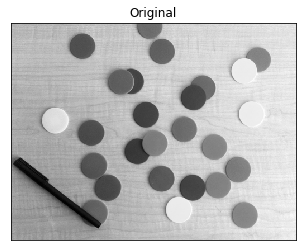

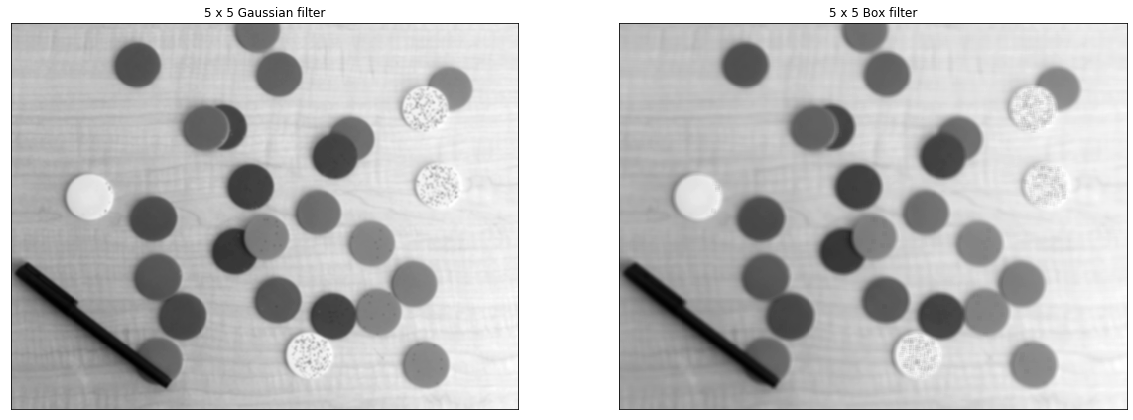


PSNR with  5 x 5
Gaussian vs Clean:  34.45888479026088
Blur vs Clean:      32.64650460360563


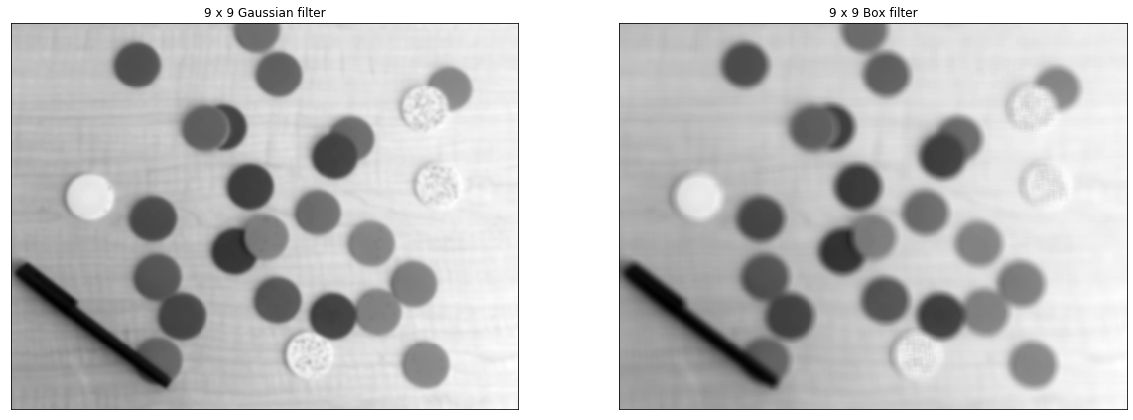


PSNR with  9 x 9
Gaussian vs Clean:  32.68002449425201
Blur vs Clean:      29.700705335960464


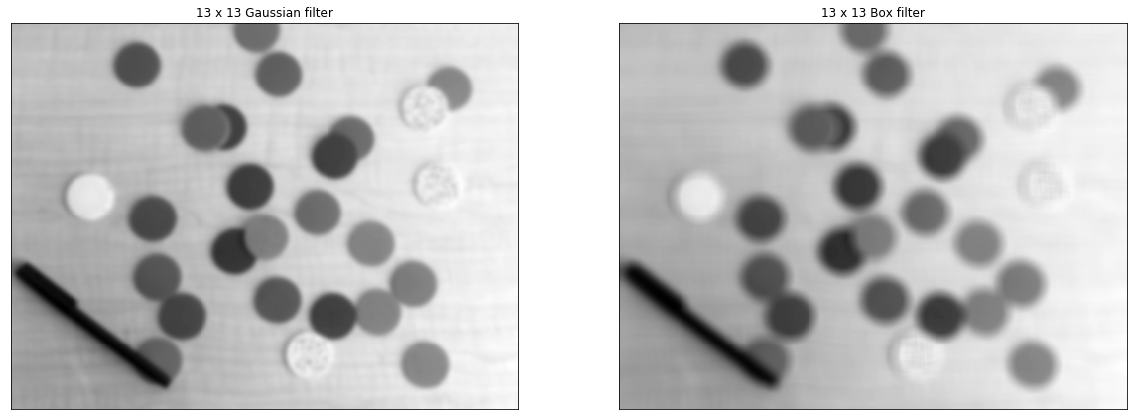


PSNR with  13 x 13
Gaussian vs Clean:  31.195207041592482
Blur vs Clean:      27.763219472183856


In [18]:
image_path_noisy = "./Circles_gauss.png"
image_path_clean = "./Circles.png"

img_clean = cv2.imread(image_path_clean,cv2.IMREAD_GRAYSCALE)
img_noisy = cv2.imread(image_path_noisy,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_clean, cmap="gray")
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.show()

def WhiteGauss(filterSize):
    
    # filter image using Gaussian
    gaus = cv2.GaussianBlur(img_noisy, (filterSize,filterSize), 0)

    # filter image using blur
    blur = cv2.blur(img_noisy, (filterSize,filterSize))
    

    # plot
    plt.figure(figsize=(20, 20))    
    plt.subplot(121),plt.imshow(gaus, cmap="gray")
    plt.title("%i x %i Gaussian filter"%(filterSize,filterSize) ), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(blur, cmap="gray")
    plt.title("%i x %i Box filter"%(filterSize,filterSize) ), plt.xticks([]), plt.yticks([])
    
    
    plt.show()

    print("\nPSNR with ", filterSize, "x", filterSize)
    print('Gaussian vs Clean: ', cv2.PSNR(img_clean, gaus))
    print('Blur vs Clean:     ', cv2.PSNR(img_clean, blur))

    return;
    
WhiteGauss(5)
WhiteGauss(9)
WhiteGauss(13)


2.1.3 The gaussian filter does a better job in retaining the edges. The gaussian filter gives a superior result than the box filter since the PSNR is higher.

2.1.4 The PSNR decreases when the filter size increases so the image quality decreases when the filter size increases.

### 2.1.5 Salt and Pepper Noise

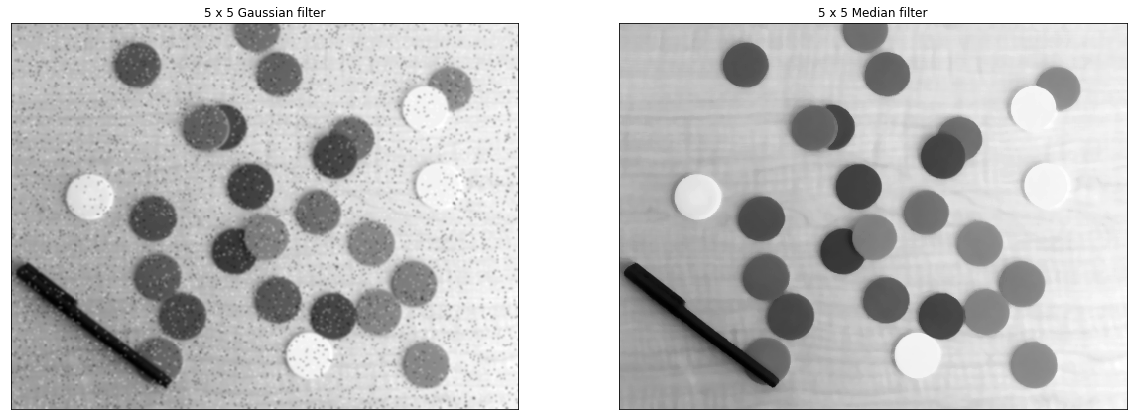


PSNR with  5 x 5
Gaussian vs Clean:  28.964408033279128
Median vs Clean:      37.32623206399119


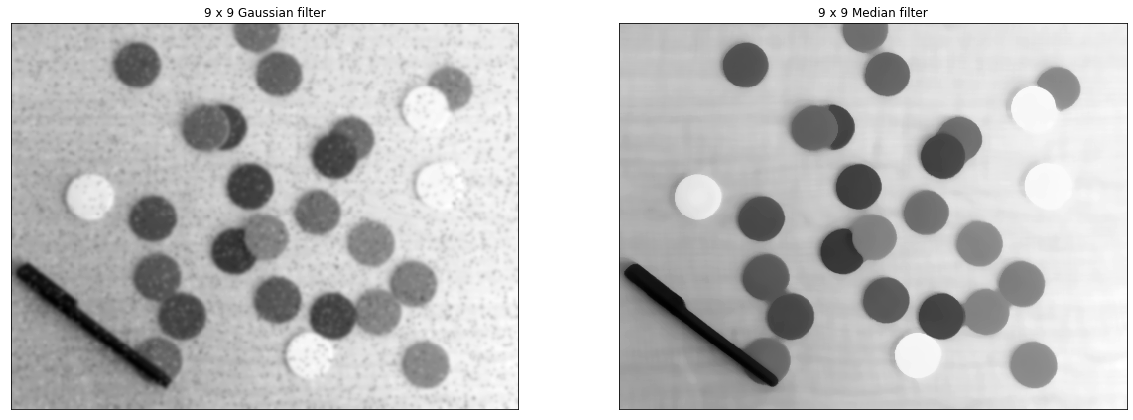


PSNR with  9 x 9
Gaussian vs Clean:  30.63622853754954
Median vs Clean:      34.606305508872886


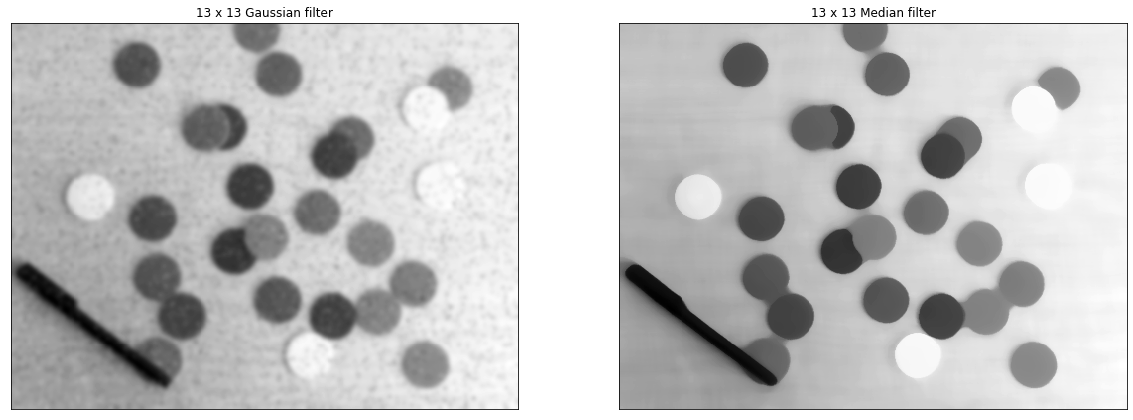


PSNR with  13 x 13
Gaussian vs Clean:  30.256604778951548
Median vs Clean:      32.55737787662019


In [23]:
image_path_clean = "./Circles.png"
img_clean = cv2.imread(image_path_clean, cv2.IMREAD_GRAYSCALE)
image_path_noisy = "./Circles_sp.png"
img_noisy = cv2.imread(image_path_noisy, cv2.IMREAD_GRAYSCALE)

def SaltAndPepper(filterSize):
    # filter image using Gaussian
    gaus = cv2.GaussianBlur(img_noisy, (filterSize,filterSize), 0)
    
    # filter image using 5x5 median filter
    median = cv2.medianBlur(img_noisy, filterSize)
    
    # plot
    plt.figure(figsize=(20, 20))  
    plt.subplot(121),plt.imshow(gaus, cmap="gray")
    plt.title("%i x %i Gaussian filter"%(filterSize,filterSize) ), plt.xticks([]), plt.yticks([])

    plt.subplot(122),plt.imshow(median, cmap="gray")
    plt.title("%i x %i Median filter"%(filterSize,filterSize) ), plt.xticks([]), plt.yticks([])
    
    plt.show()

    print("\nPSNR with ", filterSize, "x", filterSize)
    print('Gaussian vs Clean: ', cv2.PSNR(img_clean, gaus))
    print('Median vs Clean:     ', cv2.PSNR(img_clean, median))

    return;


SaltAndPepper(5)
SaltAndPepper(9)
SaltAndPepper(13)
    
    
    
    

2.1.7 The median filter gives better result since the PSNR is always higher than the Gaussian filter.
2.1.8 The salt and pepper noise decreases when the size of the median filter increases. There is a slight reduction of salt and pepper noise when increasing the Gaussian filter size but s&p noise is still very noticeable so the gaussian filter is not a good filter to remove s&p noise.

## 2.2 Sharpening 

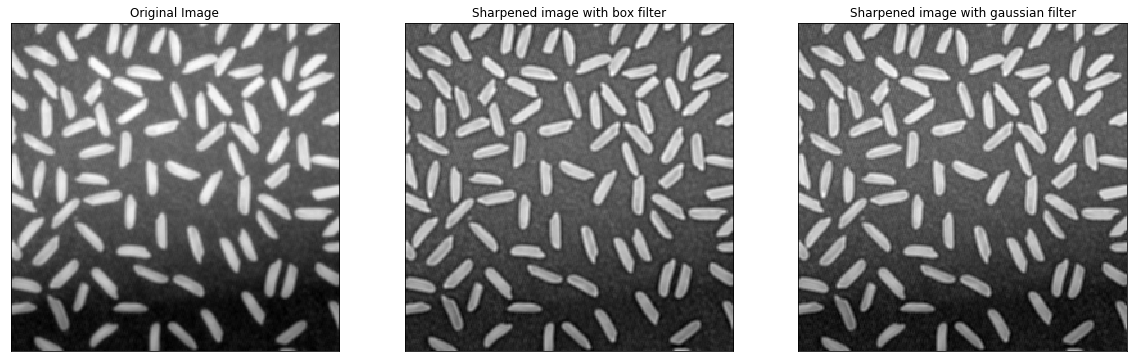

In [5]:
image_path = "rice.png"

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# filter image using blur
blur = cv2.blur(img, (7,7))

# filter image using Gaussian
gaus = cv2.GaussianBlur(img, (7,7), 0)

def SharpenImage(Image):
    img_d = img - Image
    img_s = img + img_d
    return img_s

# plot
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Original Image" ), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(SharpenImage(blur), cmap="gray")
plt.title("Sharpened image with box filter" ), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(SharpenImage(gaus), cmap="gray")
plt.title("Sharpened image with gaussian filter"), plt.xticks([]), plt.yticks([])
plt.show()





2.2.2  In the previous section, we saw that the gaussian filter gives better results than the box filter when comparing the PSNR. Therefore the gaussian filter provides better result when used for sharpening.

# 3 - Edge detection

## 3.1 Sobel edge detector

### 3.1.1 Effect of sharpening on edge detection

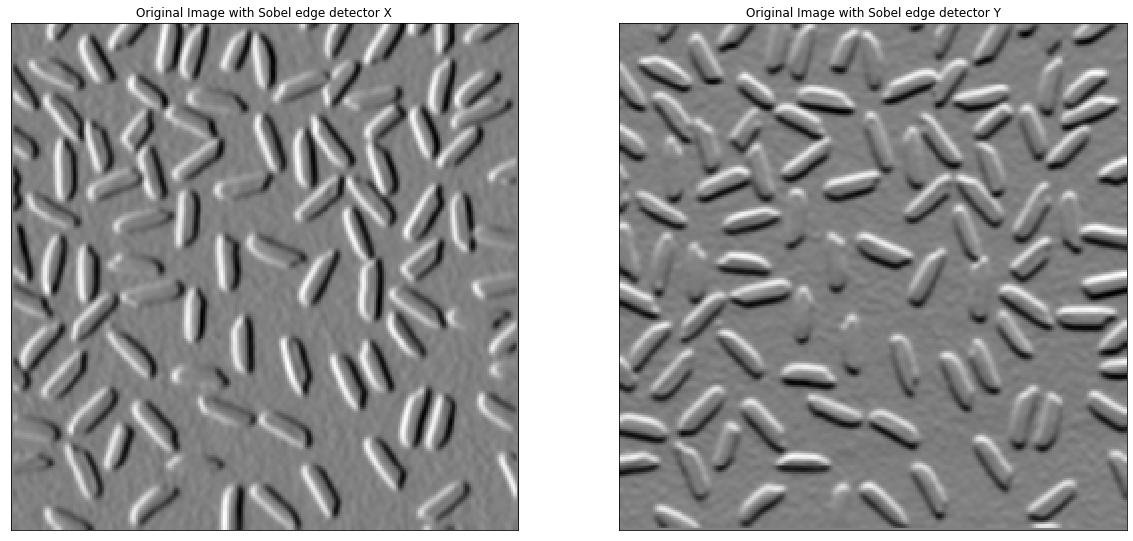

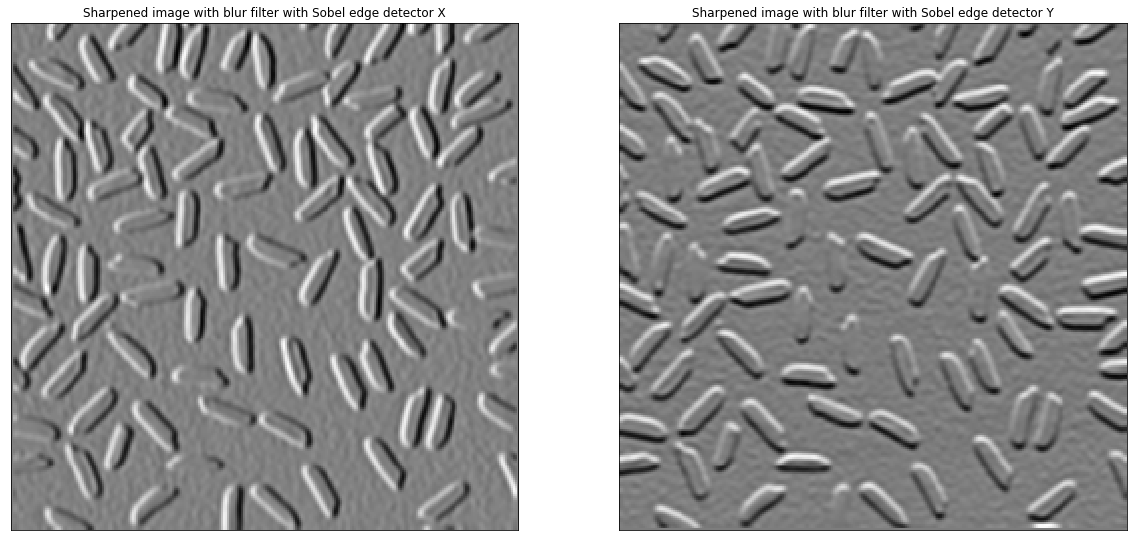

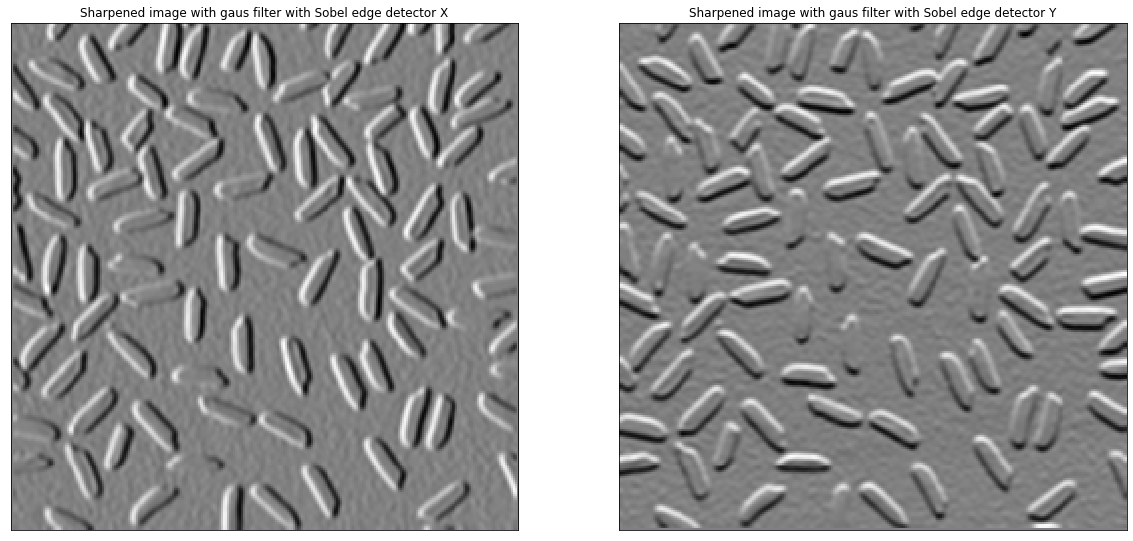

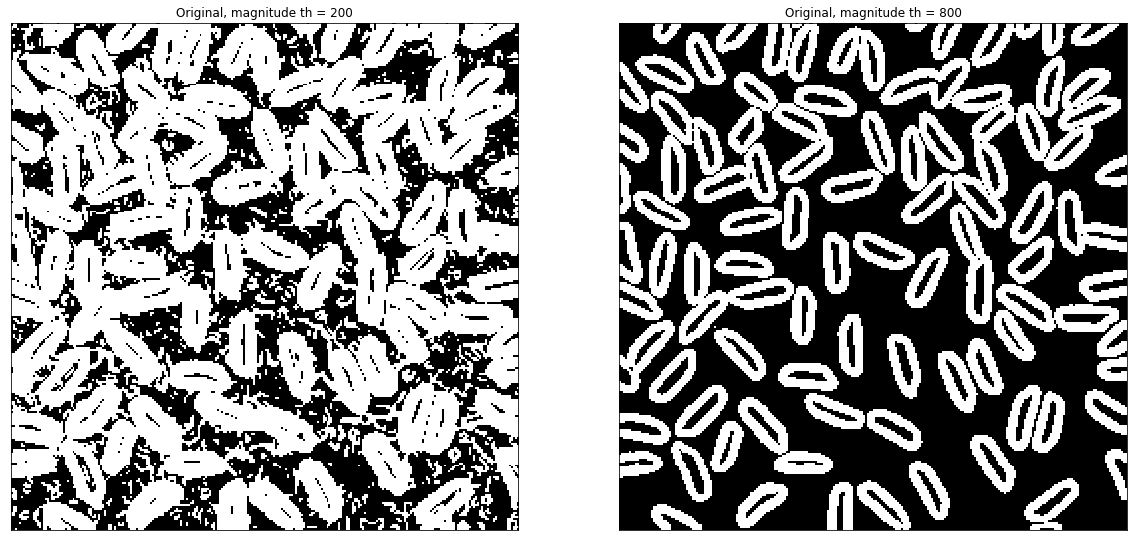

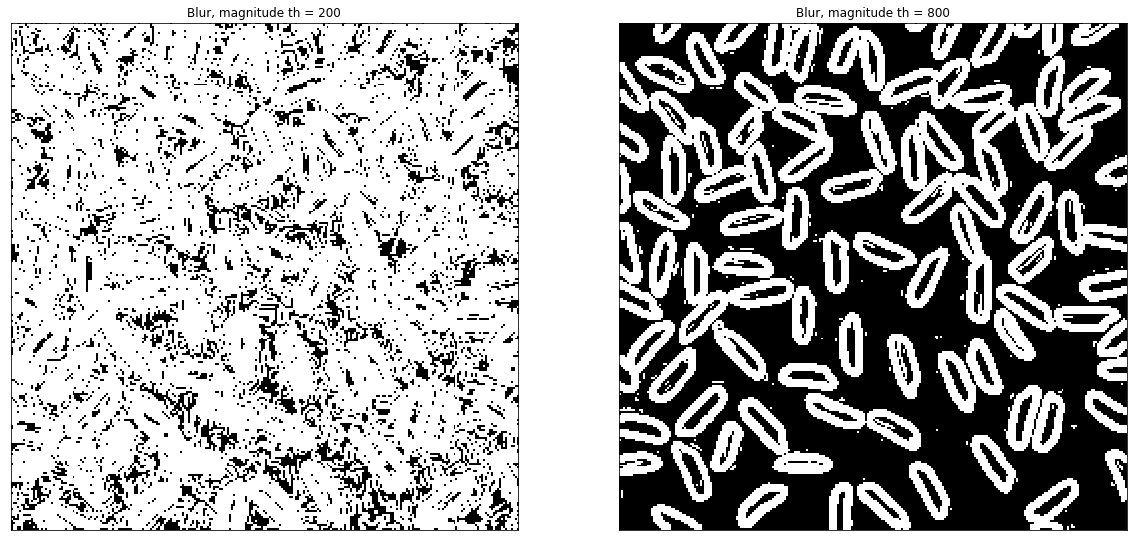

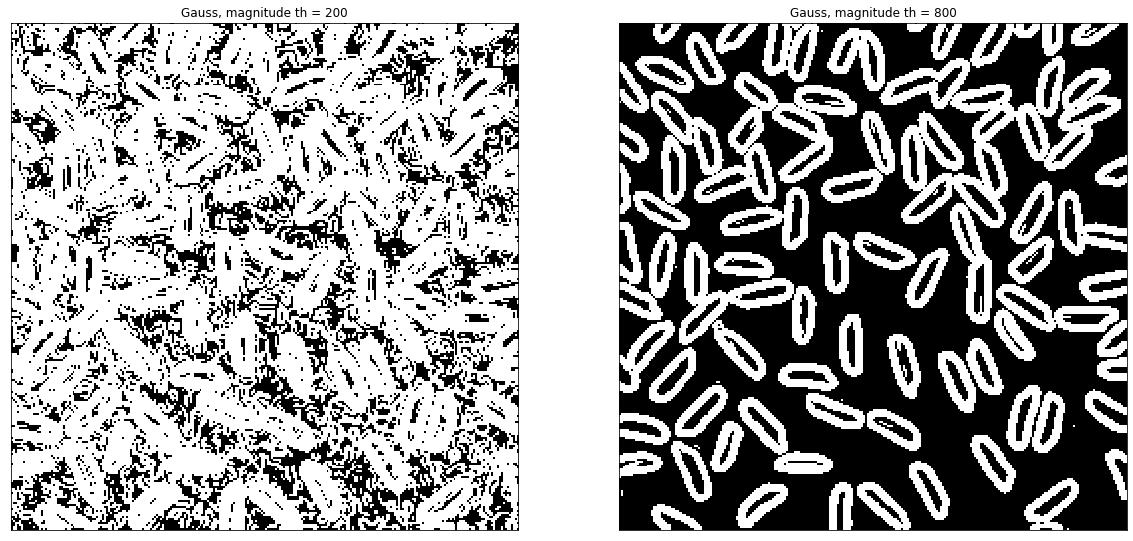

In [6]:
image_path = "rice.png"

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# apply 5x5 Sobel filters to the intensity channel
sobel_og_x = cv2.Sobel(img,cv2.CV_64F, 1, 0, ksize=5)
sobel_og_y = cv2.Sobel(img,cv2.CV_64F, 0, 1, ksize=5)
sobel_blur_x = cv2.Sobel(SharpenImage(blur), cv2.CV_64F, 1, 0, ksize=5)
sobel_blur_y = cv2.Sobel(SharpenImage(blur), cv2.CV_64F, 0, 1, ksize=5)
sobel_gaus_x = cv2.Sobel(SharpenImage(gaus), cv2.CV_64F, 1, 0, ksize=5)
sobel_gaus_y = cv2.Sobel(SharpenImage(gaus), cv2.CV_64F, 0, 1, ksize=5)


# compute sobel Magnitude
og_m = cv2.magnitude(sobel_og_x, sobel_og_y)
blur_m = cv2.magnitude(sobel_blur_x, sobel_blur_y)
gaus_m = cv2.magnitude(sobel_gaus_x, sobel_gaus_y)

# Threshold
ret, og_m_200 = cv2.threshold(og_m , 200, 255, cv2.THRESH_BINARY) 
ret, og_m_800 = cv2.threshold(og_m , 800, 255, cv2.THRESH_BINARY) 
ret, blur_m_200 = cv2.threshold(blur_m , 200, 255, cv2.THRESH_BINARY) 
ret, blur_m_800 = cv2.threshold(blur_m , 800, 255, cv2.THRESH_BINARY) 
ret, gaus_m_200 = cv2.threshold(gaus_m , 200, 255, cv2.THRESH_BINARY) 
ret, gaus_m_800 = cv2.threshold(gaus_m , 800, 255, cv2.THRESH_BINARY) 



# plot
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(sobel_og_x, cmap="gray")
plt.title("Original Image with Sobel edge detector X"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sobel_og_y , cmap="gray")
plt.title("Original Image with Sobel edge detector Y"), plt.xticks([]), plt.yticks([])


plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(sobel_blur_x, cmap="gray")
plt.title("Sharpened image with blur filter with Sobel edge detector X"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sobel_blur_y , cmap="gray")
plt.title("Sharpened image with blur filter with Sobel edge detector Y"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(sobel_gaus_x, cmap="gray")
plt.title("Sharpened image with gaus filter with Sobel edge detector X"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sobel_gaus_y , cmap="gray")
plt.title("Sharpened image with gaus filter with Sobel edge detector Y"), plt.xticks([]), plt.yticks([])


plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(og_m_200, cmap="gray")
plt.title("Original, magnitude th = 200"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(og_m_800 , cmap="gray")
plt.title("Original, magnitude th = 800"), plt.xticks([]), plt.yticks([])


plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(blur_m_200, cmap="gray")
plt.title("Blur, magnitude th = 200"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur_m_800 , cmap="gray")
plt.title("Blur, magnitude th = 800"), plt.xticks([]), plt.yticks([])


plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(gaus_m_200, cmap="gray")
plt.title("Gauss, magnitude th = 200"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaus_m_800 , cmap="gray")
plt.title("Gauss, magnitude th = 800"), plt.xticks([]), plt.yticks([])


plt.show()

After sharpening the image, the edges of the rice are more defined so the edge detector does a better job.

The image thresholded at 200 is filled with noise and the shape of a rice grain is not even visible contrary to the image thresholded at 800. A higher threshold retains only the strong edges and remove the weak edges thus removing the noise. 

### 3.1.2 Effect of Denoising on Edge Detection

(Text(0.5, 1.0, 'Sobel edge detection on denoised image with gaussian filter 5x5'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

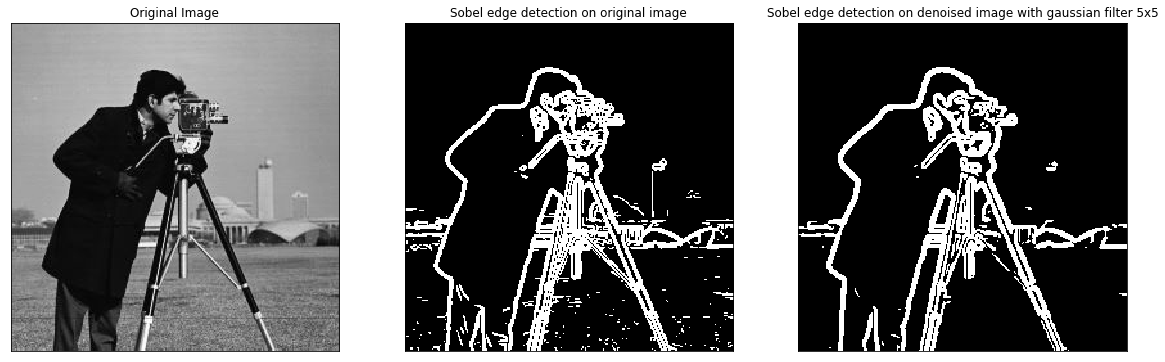

In [7]:
img_path = "./cameraman.jpg"
img_og = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

#apply sobel to original image
img_og_sobel_x = cv2.Sobel(img_og,cv2.CV_64F, 1, 0, ksize=5)
img_og_sobel_y = cv2.Sobel(img_og,cv2.CV_64F, 0, 1, ksize=5)

# blur image before applying sobel
img_gaus = cv2.GaussianBlur(img_og, (5,5), 0)
img_gaus_sobel_x = cv2.Sobel(img_gaus,cv2.CV_64F, 1, 0, ksize=5)
img_gaus_sobel_y = cv2.Sobel(img_gaus,cv2.CV_64F, 0, 1, ksize=5)

# compute sobel Magnitude
img_og_m = cv2.magnitude(img_og_sobel_x,img_og_sobel_y)
img_gaus_m = cv2.magnitude(img_gaus_sobel_x, img_gaus_sobel_y)

#threshold the sobel magnitude
ret, img_og_m = cv2.threshold(img_og_m, 1500, 255, cv2.THRESH_BINARY)
ret, img_gaus_m = cv2.threshold(img_gaus_m, 1500, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img_og, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_og_m, cmap="gray")
plt.title("Sobel edge detection on original image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_gaus_m , cmap="gray")
plt.title("Sobel edge detection on denoised image with gaussian filter 5x5"), plt.xticks([]), plt.yticks([])

There are clearly more edges detected by the Sobel detector when we do not denoise the image prior to applying the edge detector. e.g. the wrinkles on the camera man pants are shown before denoising, same for the left edge of the tower. 

## 3.2 Laplacian of Gaussian

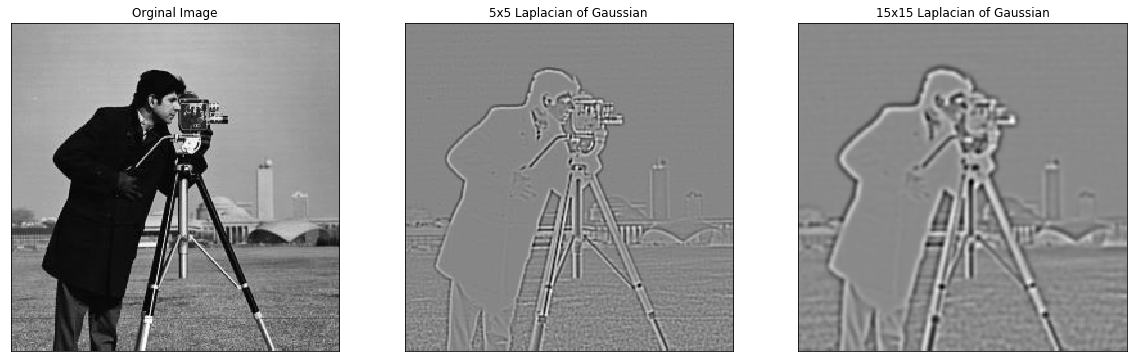

In [8]:
# load the image as grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply 5x5, 15x15 Laplacian filter to the intensity channel
img_5x5 = cv2.Laplacian(img, cv2.CV_32F, ksize=5)
img_15x15 = cv2.Laplacian(img, cv2.CV_32F, ksize=15)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Orginal Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_5x5, cmap="gray")
plt.title("5x5 Laplacian of Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_15x15, cmap="gray")
plt.title("15x15 Laplacian of Gaussian"), plt.xticks([]), plt.yticks([])
plt.show()

More edges are retained with 5x5 than 15x15. Less dominant edges are lost e.g. the grass, the hand of the cameraman.

##  3.3 Canny Edge Detection

## 3.3.1 

The 4 steps of Canny edge detection are:

    - apply gaussian
    - find magnitude and orientation of gradient
    - apply non-maximum suppression
    - apply double threshold for hysteresis
    

## 3.3.2

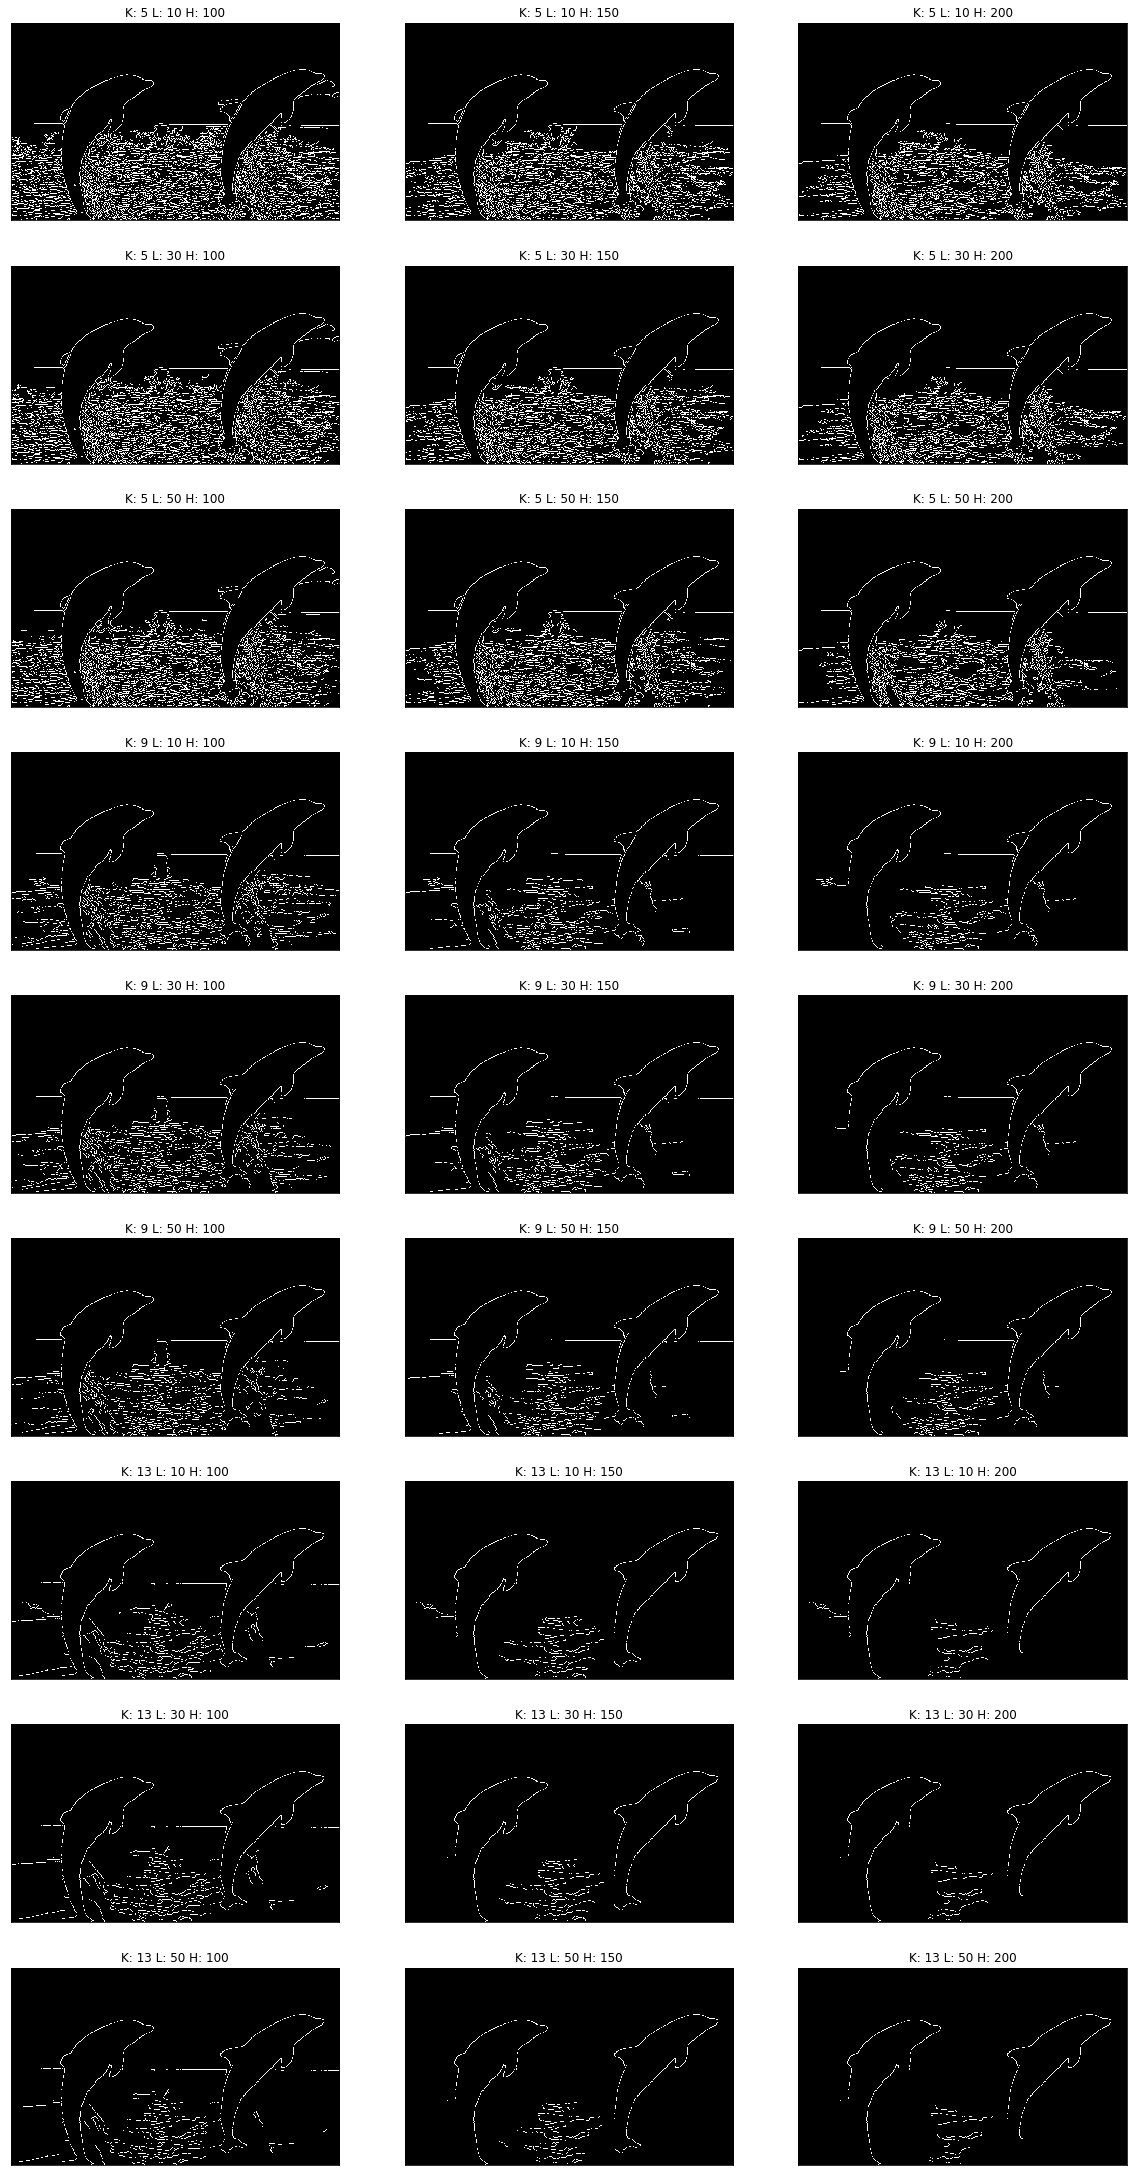

In [9]:
## # EDGE DETECTION #
##################

# load image as gray-scaled
img_path = "./dolphin.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# compute Canny edges
k = [5, 9, 13]
l = [10, 30,50]
h = [100,150,200]



# plt.figure(figsize=(20, 100))

# img_r = cv2.GaussianBlur(img, (9, 9), 0)
# img_r = cv2.Canny(img_r, 100, 150)

# img_c = cv2.GaussianBlur(img, (15, 15), 0)
# img_c = cv2.Canny(img_c, 100, 180)

# plt.figure(figsize=(20, 20))
# plt.subplot(121), plt.imshow(img_r, cmap="gray")
# plt.xticks([]), plt.yticks([])
# plt.subplot(122), plt.imshow(img_c , cmap="gray")
# plt.xticks([]), plt.yticks([])
i = 1
plt.figure(figsize=(20, 120))
for x in k:
    for y in l:
        for z in h:
            # blur image before-hand
            img_c = cv2.GaussianBlur(img, (x, x), 0)
            img_c = cv2.Canny(img_c, y, z)
            plt.subplot(27,3,i), plt.imshow(img_c, cmap="gray"), 
            plt.title("K: " + str(x) + " L: " + str(y) + " H: " + str(z)), plt.xticks([]), plt.yticks([])
            i += 1
        
plt.show()

## 3.3.1 

In this section, I am fixing two parameters and modifying the third one to see how it affects the edge detection.

When we increase the kernel size (K), the edges of the waves are less and less detected so noise is removed. The higher the kernel size, the lower the detector’s sensitivity to noise.

Increase the high threshold, stronger edges are retained.
Increase the low threshold, weaker edges are suppressed, considered as noise.

The low and high thresholds used for hysterisis are related. If an edge pixel’s gradient value is smaller than the high threshold value and larger than the low threshold value, we check if there is a strong edge in its neighboorhood, the edge is retained in the positive case and discarded otherwise.  

## 3.3.2 
Comparing all the images above, it is clear that using the highest value of all three parameters, which is K = 13, L = 50 and H = 200,  retain the edges of the dolphins and supress all the noise created by the water or the horizon. If we are not restricted by the values given in the assignment, we can find a better set of hyper-parameters to retain only the dolphins edges.
